# <font color = 'tomato'>Krishna_GM Satellite Imagery Analysis using Python</font>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import Modules

In [ ]:
!pip install earthpy gdal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 56.1 MB/s eta 0:00:00


In [ ]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Data

/content/drive/MyDrive/Colab Notebooks/Data


## Sentine 2 Band Details

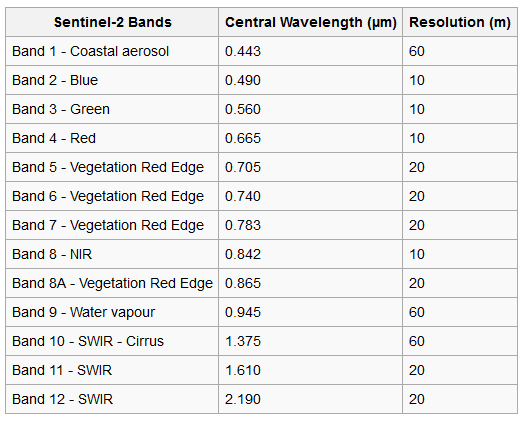

# DataSet

## Krishna_GM Satellite Data

In [ ]:
S_sentinel_bands = glob("/content/drive/MyDrive/Colab Notebooks/Data/Krishna_GM_data/*B?*.tiff")
S_sentinel_bands.sort()
S_sentinel_bands

In [ ]:
l = []
for i in S_sentinel_bands:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))


In [ ]:
arr_st = np.stack(l)     #reshape data along specified new axis ex: (2,1)->(1,2)

In [ ]:
arr_st.shape

(12, 954, 298)

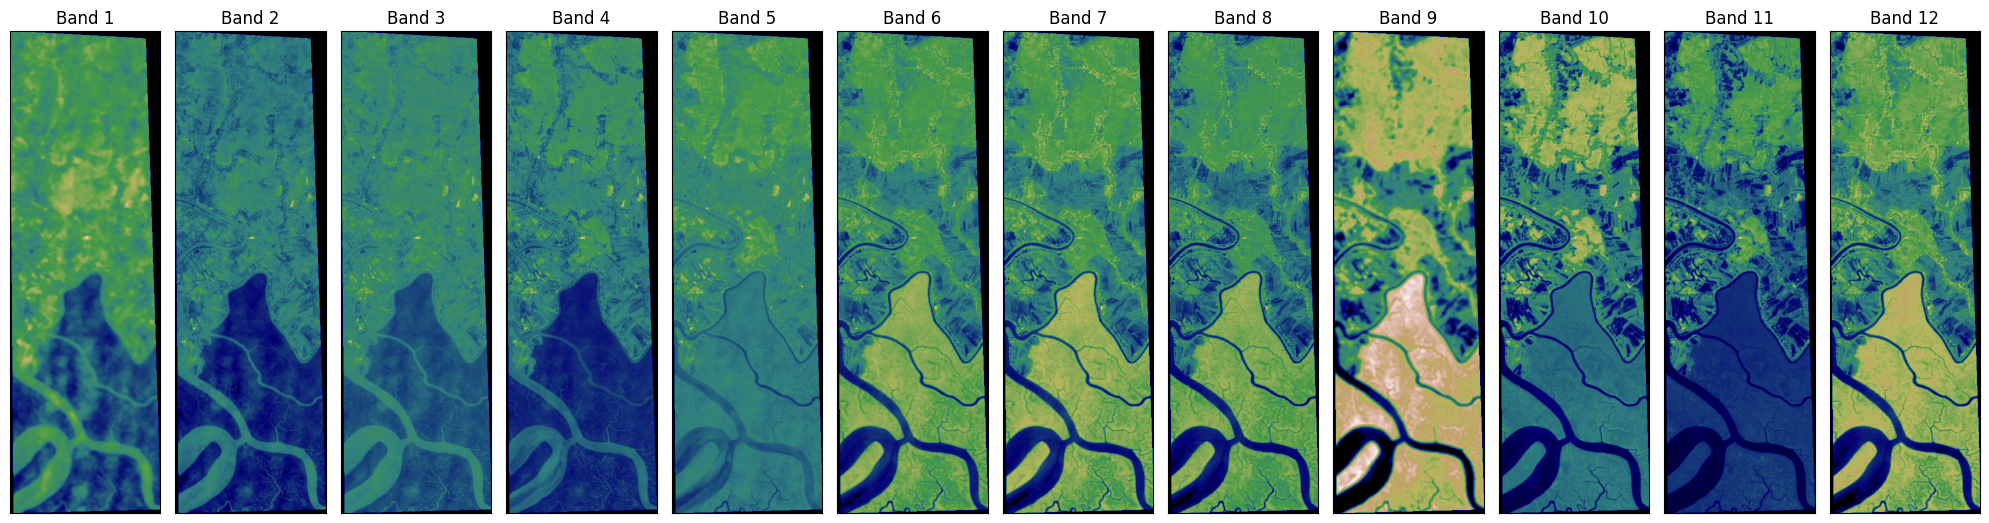

In [ ]:
ep.plot_bands(arr_st, cmap = 'gist_earth', figsize = (20, 12), cols = 12, cbar = False)
plt.show()

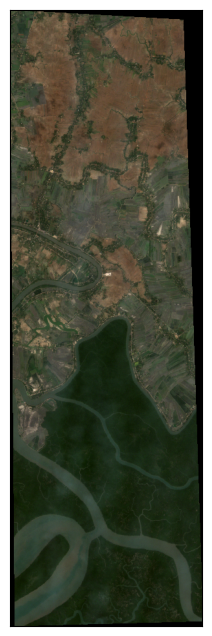

In [ ]:
rgb = ep.plot_rgb(arr_st, 
                  rgb=(3,2,1), 
                  figsize=(5,8), 
                  # title='RGB Composite Image'
                  )

plt.show()

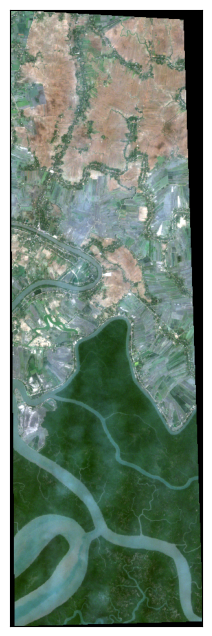

In [ ]:
ep.plot_rgb(
    arr_st,
    rgb=(3, 2, 1),
    stretch=True,
    str_clip=0.2,
    figsize=(5,8),
    # title="RGB Composite Image with Stretch Applied",
)

plt.show()

# Vegetation and soils indices

## Normalized Difference Vegetation Index (NDVI)
```
NDVI = ((NIR - Red)/(NIR + Red))
```

* NIR = pixel values from the near-infrared band
* Red = pixel values from the red band

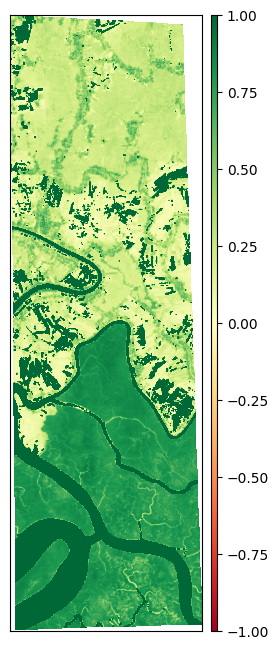

In [ ]:
ndvi = es.normalized_diff(arr_st[7], arr_st[3])

ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(5,8))

plt.show()

## Soil-Adjusted Vegetation Index (SAVI) 

```
SAVI = ((NIR - Red) / (NIR + Red + L)) x (1 + L)
```
* NIR = pixel values from the near infrared band
* Red = pixel values from the near red band
* L = amount of green vegetation cover

In [ ]:
L = 0.5

savi = ((arr_st[7] - arr_st[3]) / (arr_st[7] + arr_st[3] + L)) * (1 + L)

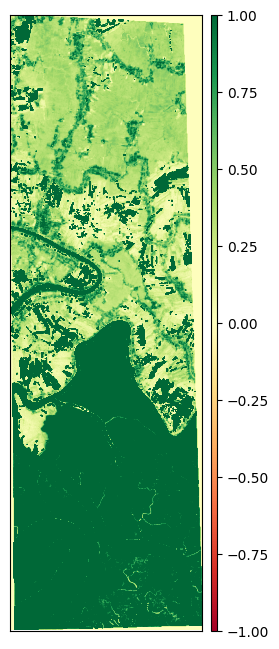

In [ ]:
ep.plot_bands(savi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(5,8))

plt.show()

## Visible Atmospherically Resistant Index (VARI)
```
VARI = (Green - Red)/ (Green + Red - Blue)
```
* Green = pixel values from the green band
* Red= pixel values from the red band
* Blue = pixel values from the blue band

In [ ]:
vari = (arr_st[2] - arr_st[3])/ (arr_st[2] + arr_st[3] - arr_st[1])

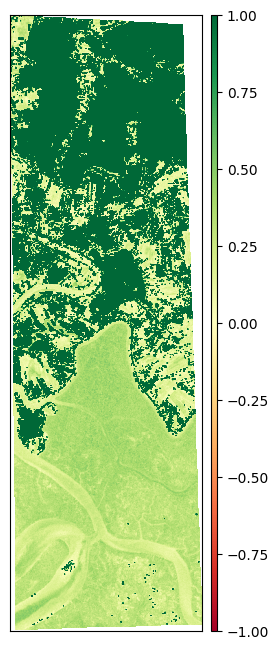

In [ ]:
ep.plot_bands(vari, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(5,8))

plt.show()

## Distribution of NDVI, SAVI, and VARI pixel values
###Pixel Intensity (0,255) vs Pixel Count

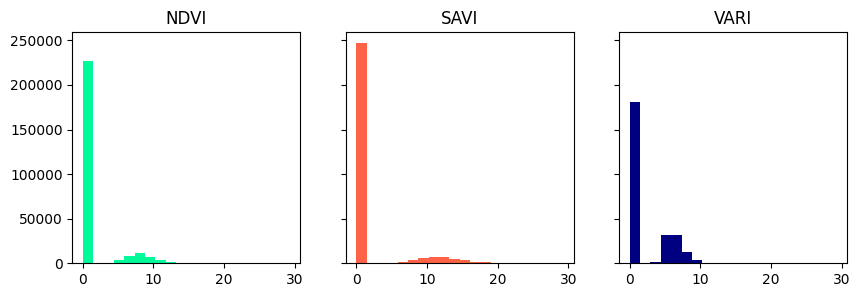

In [ ]:
ep.hist(np.stack([ndvi, savi, vari]), 
        alpha=1,
        cols=3, 
        figsize=(10,3),
        title = ['NDVI', 'SAVI', 'VARI'],
        colors = ['mediumspringgreen', 'tomato', 'navy'])
plt.show()

# Water Indices

## Modified Normalized Difference Water Index (MNDWI) 

```
MNDWI = (Green - SWIR) / (Green + SWIR)
```
* Green = pixel values from the green band
* SWIR = pixel values from the short-wave infrared band

In [ ]:
mndwi = es.normalized_diff(arr_st[2], arr_st[10])

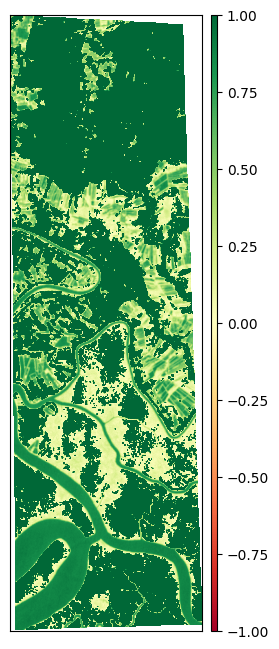

In [ ]:
ep.plot_bands(mndwi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(5,8))

plt.show()

## Normalized Difference Moisture Index (NDMI) 

```
NDMI = (NIR - SWIR1)/(NIR + SWIR1)
```
* NIR = pixel values from the near infrared band
* SWIR1 = pixel values from the short-wave infrared 1 band

In [ ]:
ndmi = es.normalized_diff(arr_st[7], arr_st[10])

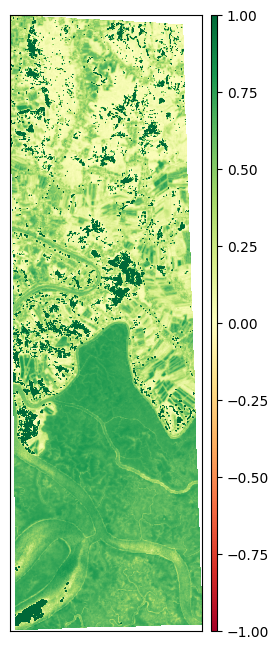

In [ ]:
ep.plot_bands(ndmi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(5,8))

plt.show()

# Geology Indices

## Clay Minerals
```
Clay Minerals Ratio = SWIR1 / SWIR2
```
* SWIR1 = pixel values from the short-wave infrared 1 band
* SWIR2 = pixel values from the short-wave infrared 2 band

In [ ]:
cmr = np.divide(arr_st[10], arr_st[11])

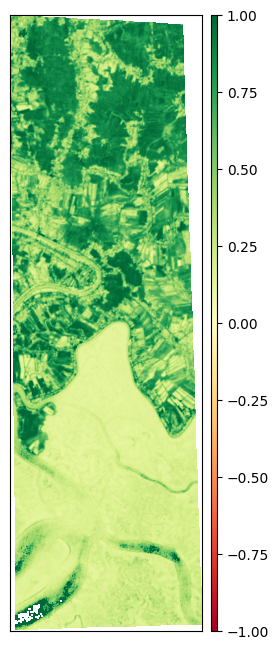

In [ ]:
ep.plot_bands(cmr, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(5,8))

plt.show()

## Ferrous Minerals

```
Ferrous Minerals Ratio = SWIR / NIR
```

* SWIR= pixel values from the short-wave infrared band
* NIR = pixel values from the near infrared band

In [ ]:
fmr = np.divide(arr_st[10], arr_st[7])

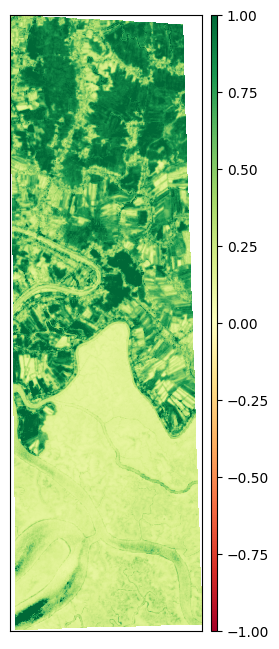

In [ ]:
ep.plot_bands(fmr, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(5,8))

plt.show()